<a href="https://colab.research.google.com/github/Jeffrey-Moon/Trend_of_Stocks_Before_and_After_COVID-19/blob/master/Moon%2C_Jeffrey_Python_3_Portfolio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [17]:
import pandas as pd

In [18]:
!ls

drive  sample_data


In [19]:
%pwd

'/content'

In [20]:
%ls

drive/  sample_data/


In [21]:
%cd drive/

/content/drive


In [22]:
%pwd

'/content/drive'

In [23]:
%ls

MyDrive/


In [24]:
%cd My\ Drive

/content/drive/My Drive


In [25]:
%cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [26]:
%ls

 2021-03-08_Apriori.ipynb
 2021-03-10_Vector_Diistance.ipynb
 2021-03-12_TF-IDF_2.ipynb
 2021-03-12_TF-IDF.ipynb
 2021-03-17_Torch_Basic.ipynb
 2021-03-19_MNIST.ipynb
 2021-03-19_Torch_Class.ipynb
 2021-03-23_Implementation.ipynb
'Class 1'
'Class 2'
'Class 3'
'Class 4'
'Class 5.ipynb'
'Class 6'
'Moon, Jeffrey - Python 3 Portfolio 3.ipynb'
'Moon, Jeffrey - Python 3 Portfolio Part 1'
'Moon, Jeffrey - Python 3 Portfolio Part 2'
 notebook_files/
 owid-covid-data.csv
 Untitled0.ipynb


In [27]:
world_wide_corona = pd.read_csv('owid-covid-data.csv')

In [28]:
world_wide_corona[world_wide_corona['location']=='World']['total_cases']

39213          27.0
39214          27.0
39215          27.0
39216          44.0
39217          44.0
            ...    
39448    22970370.0
39449    23236838.0
39450    23461327.0
39451    23681358.0
39452    23928539.0
Name: total_cases, Length: 240, dtype: float64

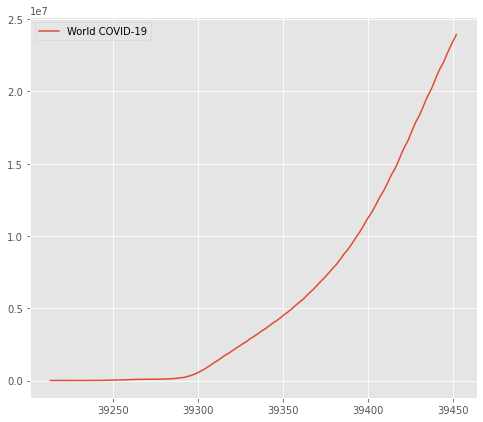

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
from matplotlib import style

mpl.rc('figure', figsize=(8, 7))
# Use ggplot style
style.use('ggplot')

world_wide_corona[world_wide_corona['location']=='World']['total_cases'].plot(label = 'World COVID-19')
plt.legend()
plt.show()

In [30]:
# Calculate maximum drawdown

def calculate_max_drawdown(adj_close, capital, stock_pct, bond_pct):
  stock_share = capital*(stock_pct/100)/adj_close['S&P 500'][0]
  bond_share = capital*(bond_pct/100)/adj_close['Treasury Yield 10 Years'][0]

  stock_cummax = (adj_close['S&P 500']*stock_share).cummax()
  bond_cummax = (adj_close['Treasury Yield 10 Years']*bond_share).cummax()
  portfolio_cummax = (adj_close['Treasury Yield 10 Years']*bond_share + adj_close['S&P 500']*stock_share).cummax()

  stock_delta_max = stock_cummax - (adj_close['S&P 500']*stock_share)
  bond_delta_max = bond_cummax - (adj_close['Treasury Yield 10 Years']*bond_share)
  portfolio_delta_max = portfolio_cummax - (adj_close['Treasury Yield 10 Years']*bond_share + adj_close['S&P 500']*stock_share)

  stock_delta_max_idx = stock_delta_max.idxmax()
  bond_delta_max_idx = bond_delta_max.idxmax()
  portfolio_delta_max_idx = portfolio_delta_max.idxmax()

  stock_max_drawdown = stock_delta_max.loc[stock_delta_max_idx]/stock_cummax.loc[stock_delta_max_idx]*100
  bond_max_drawdown = bond_delta_max.loc[bond_delta_max_idx]/bond_cummax.loc[bond_delta_max_idx]*100
  portfolio_max_drawdown = portfolio_delta_max.loc[portfolio_delta_max_idx]/portfolio_cummax.loc[portfolio_delta_max_idx]*100  

  print('='*60)
  print('The maximum drawdown for S&P 500 is {:.2f}%'.format(stock_max_drawdown))
  print('The maximum drawdown for bond is {:.2f}%'.format(bond_max_drawdown))
  print('The maximum drawdown for this portfolio is {:.2f}%'.format(portfolio_max_drawdown))
  print('='*60, '\n')

In [31]:
# Calculate maximum drop in pct

def calculate_pct_change(adj_close, capital, stock_pct, bond_pct):
  stock_share = capital*(stock_pct/100)/adj_close['S&P 500'][0]
  bond_share = capital*(bond_pct/100)/adj_close['Treasury Yield 10 Years'][0]

  stock_max_daily_drop = (adj_close['S&P 500']*stock_share).pct_change().min()*100
  bond_max_daily_drop = (adj_close['Treasury Yield 10 Years']*bond_share).pct_change().min()*100
  portfolio_max_daily_drop = (adj_close['Treasury Yield 10 Years']*bond_share + adj_close['S&P 500']*stock_share).pct_change().min()*100

  stock_max_drop_idx = (adj_close['S&P 500']*stock_share).pct_change().idxmin()
  bond_max_drop_idx = (adj_close['Treasury Yield 10 Years']*bond_share).pct_change().idxmin()
  portfolio_max_drop_idx = (adj_close['Treasury Yield 10 Years']*bond_share + adj_close['S&P 500']*stock_share).pct_change().idxmin()

  print('='*60)
  print('The maximum daily drop for S&P 500 is {:.2f}%, which happend in {}'.format(stock_max_daily_drop, stock_max_drop_idx))
  print('The maximum daily drop for bond is {:.2f}%, which happend in {}'.format(bond_max_daily_drop, bond_max_drop_idx))
  print('The maximum daily drop for this portfolio is {:.2f}%, which happend in {}'.format(portfolio_max_daily_drop, portfolio_max_drop_idx))
  print('='*60, '\n')